<br>

## 시계열 데이터 전처리 학습

In [1]:
# 필요한 모듈 불러오기
import pandas as pd

In [2]:
# 데이터 적재
samsung_df = pd.read_csv('samsung.csv', index_col=0, header=0, encoding='cp949', sep=',')
kospi_df = pd.read_csv('kospi200.csv', index_col=0, header=0, encoding='cp949', sep=',')

# 데이터 str to int
for col in range(len(samsung_df.columns)):
    for idx in range(len(samsung_df)):
        samsung_df.iloc[idx, col] = int(samsung_df.iloc[idx, col].replace(',', ''))
for i in range(len(kospi_df.index)):                       
    kospi_df.iloc[i,4] = int(kospi_df.iloc[i,4].replace(',',''))

In [3]:
kospi_df.index

Index(['2020-01-31', '2020-01-30', '2020-01-29', '2020-01-28', '2020-01-23',
       '2020-01-22', '2020-01-21', '2020-01-20', '2020-01-17', '2020-01-16',
       ...
       '2018-05-18', '2018-05-17', '2018-05-16', '2018-05-15', '2018-05-14',
       '2018-05-11', '2018-05-10', '2018-05-09', '2018-05-08', '2018-05-04'],
      dtype='object', length=426)

In [4]:
kospi_df.head()

,open,high,low,now,volume
2020-01-31,290.24,291.47,284.53,284.53,101455
2020-01-30,293.27,294.11,287.09,288.37,101535
2020-01-29,294.38,295.67,292.45,293.98,85731
2020-01-28,294.98,296.30,291.30,292.77,130172
2020-01-23,303.77,304.72,301.71,302.33,86908


In [5]:
samsung_df.head()

,open,high,low,close,volume
2020-01-31,57800,58400,56400,56400,19749457
2020-01-30,58800,58800,56800,57200,20821939
2020-01-29,59100,59700,58800,59100,16446102
2020-01-28,59400,59400,58300,58800,23664541
2020-01-23,61800,61800,60700,60800,14916555


In [6]:
# 월별로 묶어주기 위한 전 단계로, object를 datetime 형식으로 변환
samsung_df.index = pd.to_datetime(samsung_df.index)
kospi_df.index = pd.to_datetime(kospi_df.index)

In [7]:
# '연월일'을 '연월' 로 묶어주기
tmp = samsung_df[['close']].to_period('1M')
tmp

,close
2020-01,56400
2020-01,57200
2020-01,59100
2020-01,58800
2020-01,60800
...,...
2018-05,51300
2018-05,51600
2018-05,50900
2018-05,52600


In [8]:
tmp2 = kospi_df[['now']].to_period('1M')
tmp2

,now
2020-01,284.53
2020-01,288.37
2020-01,293.98
2020-01,292.77
2020-01,302.33
...,...
2018-05,318.51
2018-05,317.31
2018-05,314.42
2018-05,315.87


In [31]:
# 월별 평균이 이루어 지는지 체크(아래에 '열 이름', 데이터, 데이터 타입 등 많은 정보가 입력된다.)
tmp2.loc['2018-05'].mean()

now    315.922778
dtype: float64

In [30]:
# float()를 통해서 데이터만 추출
float(tmp2.loc['2018-05'].mean())

315.9227777777778

In [11]:
# 평균 데이터 추출을 편하게 위해 임의로 데이터 저장
years = ['2020', '2019', '2018']
months = ['01','02','03','04','05','06','07','08', '09',
          '10','11','12']

In [12]:
len(months)

12

In [13]:
# 최종 데이터를 담을 객체 생성
means = []
values = []
values2 = []

# '연월' 에 대한 데이터를 저장
for year in years:
    for month in months:
        try:
            if '{}-{}'.format(year, month) in tmp.index:
                means.append('{}-{}'.format(year, month))
                values.append(float(tmp.loc['{}-{}'.format(year, month)].mean()))
                values2.append(float(tmp2.loc['{}-{}'.format(year, month)].mean()))
        except:
            exit

In [14]:
means

['2020-01',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12']

In [15]:
values

[58815.0,
 41600.0,
 46308.82352941176,
 44560.0,
 46061.36363636364,
 43023.80952380953,
 44865.78947368421,
 46215.217391304344,
 43840.47619047619,
 47294.73684210526,
 49880.95238095238,
 52223.80952380953,
 53507.5,
 50891.666666666664,
 48371.05263157895,
 46220.454545454544,
 45947.72727272727,
 46064.705882352944,
 43600.0,
 43429.545454545456,
 39826.31578947369]

In [16]:
values2

[296.24350000000004,
 270.8777272727273,
 286.0094117647058,
 278.5445,
 285.9672727272727,
 269.44761904761907,
 272.7173684210527,
 272.1473913043479,
 255.9033333333333,
 270.15368421052625,
 273.8390476190477,
 282.50380952380954,
 286.46399999999994,
 315.9227777777778,
 308.0094736842106,
 295.45909090909095,
 294.53818181818184,
 296.32529411764705,
 278.1747619047619,
 270.42999999999995,
 266.6610526315789]

In [17]:
dst = {
    'samsung':values,
    'kospi':values2
}

In [18]:
dst

{'samsung': [58815.0,
  41600.0,
  46308.82352941176,
  44560.0,
  46061.36363636364,
  43023.80952380953,
  44865.78947368421,
  46215.217391304344,
  43840.47619047619,
  47294.73684210526,
  49880.95238095238,
  52223.80952380953,
  53507.5,
  50891.666666666664,
  48371.05263157895,
  46220.454545454544,
  45947.72727272727,
  46064.705882352944,
  43600.0,
  43429.545454545456,
  39826.31578947369],
 'kospi': [296.24350000000004,
  270.8777272727273,
  286.0094117647058,
  278.5445,
  285.9672727272727,
  269.44761904761907,
  272.7173684210527,
  272.1473913043479,
  255.9033333333333,
  270.15368421052625,
  273.8390476190477,
  282.50380952380954,
  286.46399999999994,
  315.9227777777778,
  308.0094736842106,
  295.45909090909095,
  294.53818181818184,
  296.32529411764705,
  278.1747619047619,
  270.42999999999995,
  266.6610526315789]}

In [19]:
df = pd.DataFrame(dst, index=means)

In [20]:
df

,samsung,kospi
2020-01,58815.000000,296.243500
2019-01,41600.000000,270.877727
2019-02,46308.823529,286.009412
2019-03,44560.000000,278.544500
2019-04,46061.363636,285.967273
2019-05,43023.809524,269.447619
2019-06,44865.789474,272.717368
2019-07,46215.217391,272.147391
2019-08,43840.476190,255.903333
2019-09,47294.736842,270.153684


In [120]:
## 데이터 저장
# df.to_excel('submission.xlsx', index=True)

<br>

## 데이터 시각화

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [22]:
mpl.__version__

'3.1.1'

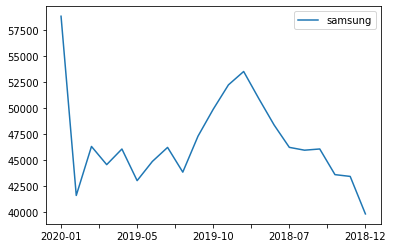

In [24]:
# pandas 데이터프레임을 바로 plot으로 그릴 수 있다.
df[['samsung']].plot()

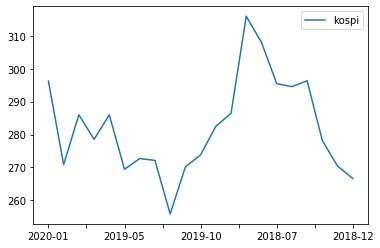

In [25]:
df[['kospi']].plot()

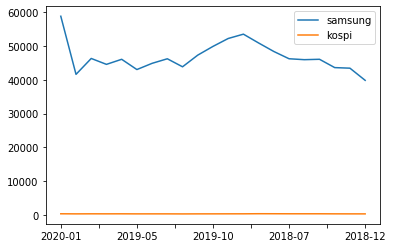

In [26]:
df[['samsung', 'kospi']].plot()

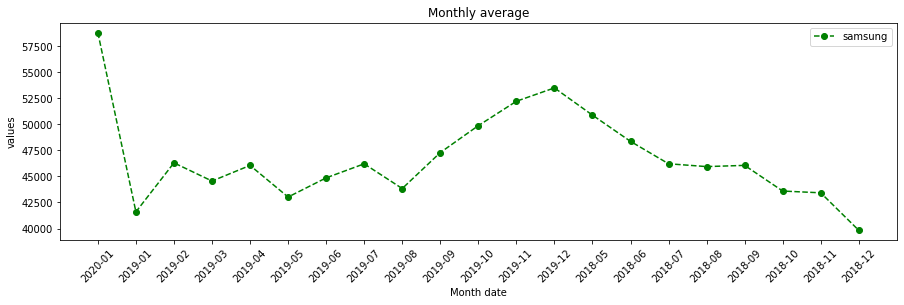

In [57]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(df.index, df['samsung'], color='g', marker='o', linestyle="--")
ax.set_xticklabels(df.index, rotation=45)

plt.xlabel('Month date')
plt.ylabel('values')
plt.title('Monthly average')
plt.legend(df)
plt.show()